In [3]:
#increase the display size to 95% of window width
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:95% !important; }</style>"))

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist
import scipy as sp
import glob
import astropy.units as u
import astropy.table as tb

from matplotlib.ticker import FormatStrFormatter
from shutil import copyfile
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.interpolate import interpn
from scipy.interpolate import RectBivariateSpline
from astropy.table import QTable

%matplotlib inline
path = os.getcwd().split('/')

machine_path = '/' + path[1] + '/' + path[2]

plt.style.use(machine_path+'/Doutorado/cenarios/mandyoc/scripts/des.mplstyle')

In [5]:
def read_params(fpath):
    '''
    Read Nx, Nz, Lx, Lz from param.txt
    '''
    with open(fpath+"param.txt","r") as f:
        line = f.readline()
        line = line.split() #split by space a string to a list of strings
        Nx = int(line[-1])
        
        line = f.readline()
        line = line.split()
        Nz = int(line[-1])

        line = f.readline()
        line = line.split()
        Lx = float(line[-1])

        line = f.readline()
        line = line.split()
        Lz = float(line[-1])

    return Nx, Nz, Lx, Lz

def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

def read_density(fpath, step, Nx, Nz):
    '''
    Read density data from density_step.txt to extract interfaces
    '''

    Rho = np.loadtxt(fpath+"density_"+str(step)+".txt",skiprows=2, unpack=True, comments="P")
    Rho = np.reshape(Rho, (Nz, Nx))

    return Rho

def read_data(prop, step, Nz, Nx, fpath):
    '''
    Read and process data according to parameters
    '''
    
    #build filename
    filename = fpath + prop + "_" + str(step) + ".txt"

    data = np.loadtxt(filename, skiprows=2, unpack=True, comments="P")
    data = np.reshape(data, (Nz, Nx))
    
    return data

def extract_interface(z, Z, Nx, Datai, interface):
    #Extract the depth of a given interface 
    topo_aux = []

    for j in np.arange(Nx):
        topoi = interp1d(z, Datai[:,j])
        idx = (np.abs(topoi(Z)-interface)).argmin()
        topo = Z[idx]
        topo_aux = np.append(topo_aux, topo)
        
    return topo_aux

# POTENTIAL TEMPERATURE ESTIMATION

Used external scenario:  stable/stable_PT200_rheol19_c1250_C1/


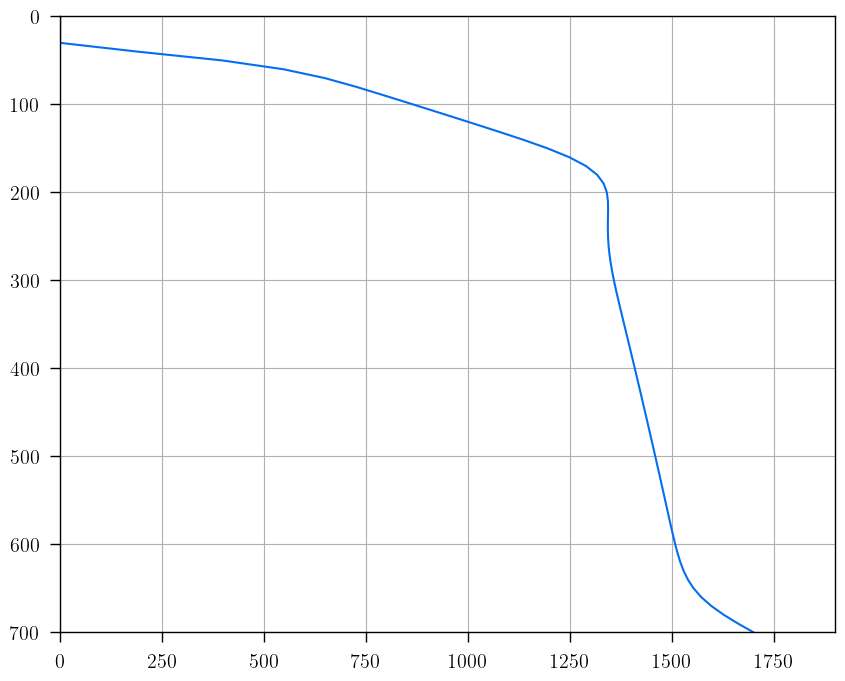

In [19]:
# scenario = 'keel/stable_DT200_keel_HprodAst/'
# scenario = 'keel/stable_DT290_keel_HprodAst/'
scenario = 'stable/stable_PT200_rheol19_c1250_C1/'
# scenario = 'stable/lit150km/stable_DT200_rheol19_c1250_C1_HprodAst_Hlit150km/'
# scenario = 'stable/lit150km/stable_DT290_rheol19_c1250_C1_HprodAst_Hlit150km/'
# scenario = 'stable/lit150km/stable_DT350_rheol19_c1250_C1_HprodAst_Hlit150km/'


print('Used external scenario: ', scenario)
fpath = machine_path + '/Doutorado/cenarios/mandyoc/' + scenario

Nx_aux, Nz_aux, Lx_aux, Lz_aux = read_params(fpath)
z_aux = np.linspace(Lz_aux, 0, Nz_aux)
x_aux = np.linspace(0, Lx_aux, Nx_aux)

xx, zz  = np.meshgrid(x_aux, z_aux)


steps = sorted(glob.glob(fpath+"time_*.txt"), key=os.path.getmtime)
step_final = int(steps[-1].split('/')[-1][5:-4]) #step of final thermal structure

time_fname = fpath + 'time_' + str(step_final) + '.txt'
time = np.loadtxt(time_fname, usecols=2, max_rows=1)

Datai = read_data('temperature', step_final, Nz_aux, Nx_aux, fpath) #(read final thermal structure (Nz, Nx)
xcenter = (xx>=700.0e3) & (xx <= 900.0e3) #craton
Datac = Datai[xcenter].reshape(Nz_aux, len(xcenter[0][xcenter[0]==True]))
datai_mean = np.mean(Datac, axis=1)

plt.plot(datai_mean, z_aux/1.0e3)
# plt.plot(dataf_mean, z)
plt.ylim([700, 0])
plt.xlim([0, 1900])
plt.grid(':k')

Used external scenario:  stable/lit150km/stable_DT350_rheol19_c1250_C1_HprodAst_Hlit150km/
shape T:  (176, 401)
stable_DT350_rheol19_c1250_C1_HprodAst_Hlit150km_Mantle_PT


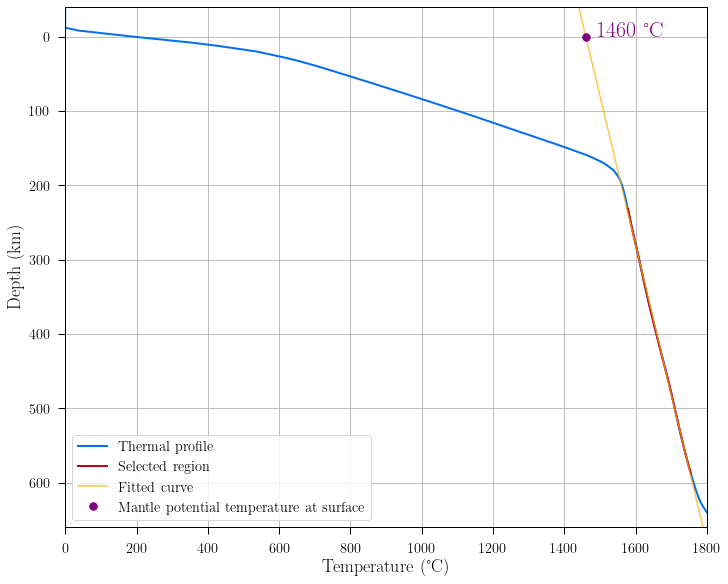

In [64]:
def fit_func(x, a, b):
    return a*x + b

Nz = 176
Nx = 401
# Nz = 71
Lz = 700.0E3
z = np.linspace(Lz, 0, Nz)


# scenario = 'stable/NoHprodAst/stable_PT200_rheol19_c1250_C1/'

# scenario = 'stable/lit80km/stable_PT200_rheol19_c1250_C1_HprodAst/'
# scenario = 'stable/lit80km/stable_PT400_rheol19_c1250_C1_HprodAst/'
# scenario = 'stable/lit80km/stable_PT280_rheol19_c1250_C1_HprodAst/'
# scenario = 'stable/lit80km/stable_PT290_rheol19_c1250_C1_HprodAst/'
# scenario = 'stable/lit80km/stable_PT350_rheol19_c1250_C1_HprodAst/'
# scenario = 'stable/lit80km/stable_PT400_rheol19_c1250_C1_HprodAst/'

# scenario = 'stable/lit150km/stable_DT200_rheol19_c1250_C1_HprodAst_Hlit150km/'
# scenario = 'stable/lit150km/stable_DT290_rheol19_c1250_C1_HprodAst_Hlit150km/'
scenario = 'stable/lit150km/stable_DT350_rheol19_c1250_C1_HprodAst_Hlit150km/'

# scenario = 'keel/stable_DT200_keel_HprodAst/'
# scenario = 'keel/stable_DT290_keel_HprodAst/'
# scenario = 'keel/stable_DT350_keel_HprodAst/'

print('Used external scenario: ', scenario)
fpath = machine_path + '/Doutorado/cenarios/mandyoc/' + scenario

Nx_aux, Nz_aux, Lx_aux, Lz_aux = read_params(fpath)
z_aux = np.linspace(Lz_aux, 0, Nz_aux)
x_aux = np.linspace(0, Lx_aux, Nx_aux)

xx, zz  = np.meshgrid(x_aux, z_aux)


steps = sorted(glob.glob(fpath+"time_*.txt"), key=os.path.getmtime)
step_final = int(steps[-1].split('/')[-1][5:-4]) #step of final thermal structure

time_fname = fpath + 'time_' + str(step_final) + '.txt'
time = np.loadtxt(time_fname, usecols=2, max_rows=1)

Datai = read_data('temperature', step_final, Nz_aux, Nx_aux, fpath) #(read final thermal structure (Nz, Nx)

keel_center=False
# keel_center=True
if(keel_center==True):
    xcenter = (xx>=700.0e3) & (xx <= 900.0e3) #craton
    Datac = Datai[xcenter].reshape(Nz_aux, len(xcenter[0][xcenter[0]==True]))
    
    #calc horizontal mean
    datai_mean = np.mean(Datac, axis=1)
    
else:
    datai_mean = np.mean(Datai, axis=1) #horizontal mean

#We need to interpolate if z axis has a higher resolution
f = interp1d(z_aux, datai_mean)
datai_mean_interp = f(z)

T = np.zeros((Nx, Nz)) #(Nx, Nz) = transpose of original shape (Nz, Nx)

for i in range(Nx): #len(Nx)
    T[i, :] = datai_mean_interp
    
T = T.T
print('shape T: ', np.shape(T))

#Save thermal profile
data_temp = np.array([z, T.T[0]]).T
np.savetxt('out/' + scenario[:-1].split('/')[-2] + '_thermal_profile_1Gyr.txt', data_temp, delimiter='\t', header='Depth(m)\tTemperature(C)')

zdata = z/1.0E3
tdata = T.T[0]

#selecting the region of interest: mantle
# cond = (zdata<=630) & (zdata>=210) #lit80km and no HprodAst
# cond = (zdata<=630) & (zdata>=210) #lit80km and with HprodAst
cond = (zdata<=630) & (zdata>=270) #lit150km
# cond = (zdata<=630) & (zdata>=280) #for keel


zcut = zdata[cond]
tcut = tdata[cond]

#select basal thermal boundary layer region
# cond2 = zdata>=630
# tadd = tdata[cond2]

#fit the curve to project to surface
params = curve_fit(fit_func, zcut, tcut)
[a, b] = params[0]

tfit = a*zdata + b #temeprature fitted

#forcing the temperature in air layer to 0.0
tfit_aux = tfit*1.0
zdata_aux = zdata*1.0
# tfit_aux[zdata<40] = 0.0

#plot temperature profiles
plt.close()
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(10,8), sharex=True, sharey=True)
ax.plot(tdata, zdata-40, alpha=1.0, label='Thermal profile', linewidth=2)
ax.plot(tcut, zcut-40, alpha=1.0, label='Selected region', linewidth=2)
ax.plot(tfit, zdata-40, 'xkcd:yellow orange', alpha=0.7, label='Fitted curve')
# ax.plot(tfit_aux[zdata_aux>=40], zdata_aux[zdata_aux>=40]-40, 'orange', alpha=0.7,
#          label='Potential temperature profile', linewidth=2)

#find the mantle potential temperature
idx = np.where(zdata==40.0)[0][0]
PT = int(np.round(tfit[idx], 0))
txt = str(np.round(PT,2)) + ' °C'
ax.text(PT+30, zdata[idx]-40, txt, fontsize=22, color='purple')
ax.plot(PT, zdata[idx]-40, '.', color='purple', markersize=15,
         label='Mantle potential temperature at surface')

#plot details
ax.set_xlim([0,1800])
ax.set_ylim([660, -40])
ax.set_xlabel('Temperature (°C)', fontsize=18)
ax.set_ylabel('Depth (km)', fontsize=18)
ax.grid(':k')
ax.legend(loc='lower left')
figname = scenario.split('/')[-2] + '_Mantle_PT'
print(figname)
fig.savefig('out/plots/' + figname + '.png', dpi=400)
fig.savefig('out/plots/' + figname + '.pdf', dpi=400)
fig.savefig(fpath+figname + '.png', dpi=400)
fig.savefig(fpath+figname + '.pdf', dpi=400)

In [30]:
fpath

'/home/joao_macedo/Doutorado/cenarios/mandyoc/stable/stable_PT200_rheol19_c1250_C1_HprodAst/'

# Interpolated final thermal state of stable scenario in a higher resolution grid with mean temperature at lateral boundaries

In [4]:
#Parameters of new scenario
# total model horizontal extent (m)
Lx = 1600 * 1.0e3
# total model vertical extent (m)
Lz = 700 * 1.0e3 #400 * 1.0e3
# number of points in horizontal direction
Nx = 801 #801 #161 #1601
# number of points in vertical direction
Nz = 351 #71 #351 #71 #301 #401

x = np.linspace(0, Lx/1.0e3, Nx)
z = np.linspace(Lz/1.0e3, 0, Nz)

# scenarios = ['stable_PT200_rheol19_c1250_C1/']
scenarios = ['stable_PT200_rheol19_c1250_C1_HprodAst/']
# scenarios = ['stable_PT280_rheol19_c1250_C1_HprodAst/']

prop = ['temperature']

for scenario in scenarios:
    #Read thermal state
    print(scenario)
    fpath = machine_path + '/Doutorado/cenarios/mandyoc/stable/' + scenario
    Nx_aux, Nz_aux, Lx_aux, Lz_aux = read_params(fpath)

    #Used to map interface
    x_aux = np.linspace(0, Lx_aux/1000.0, Nx_aux)
    z_aux = np.linspace(Lz_aux/1000.0, 0, Nz_aux)
    xx, zz  = np.meshgrid(x_aux, z_aux)
    #Z = np.linspace(Lz_aux/1000.0, 0, 8001) #zi
    
    #read time_*.txt files
    steps = sorted(glob.glob(fpath+"time_*.txt"), key=os.path.getmtime)
    step_final = int(steps[-1].split('/')[-1][5:-4])
    t0 = int(steps[0].split('/')[-1][5:-4])
    t1 = int(steps[1].split('/')[-1][5:-4])
    d_step = (t1 - t0)*1
    step_final = int(steps[-1].split('/')[-1][5:-4])
    
    time_fname = fpath + 'time_' + str(step_final) + '.txt'
    time = np.loadtxt(time_fname, usecols=2, max_rows=1)

    Datai = read_data('temperature', step_final, Nz_aux, Nx_aux, fpath)
#     print(Datai[0], Datai[-1])
#     datai_mean = np.mean(Datai, axis=1)
    
    #Interp data to a smaller grid
    
    f = interp2d(x_aux, z_aux, Datai, kind='linear')
    temper_interp = f(x, z)
    temper_interp[temper_interp <= 1.0e-7] = 0.0
#     print(temper_interp[0], temper_interp[-1])
    bound='mean'
    if(bound == 'mean'):
        #Calc horizontal mean
        temper_interp_mean = np.mean(temper_interp, axis=1)
        #Apply horizontal mean to vertical boundaries
        for i in range(Nz):
            temper_interp[i][0] = temper_interp_mean[i]
            temper_interp[i][-1] = temper_interp_mean[i]
    else:
        #
        step_initial = int(steps[0].split('/')[-1][5:-4])

        time_fname = fpath + 'time_' + str(step_initial) + '.txt'
        time = np.loadtxt(time_fname, usecols=2, max_rows=1)

        T0i = read_data('temperature', step_final, Nz_aux, Nx_aux, fpath)
        T0 = T0i[:, 0]

        f = interp1d(z_aux, T0)
        T0_interp = f(z)
        T0_interp[T0_interp<=1.0e-7] = 0.0
        
        #apply to boundaries
        for i in range(Nz):
            temper_interp[i][0] = T0_interp[i]
            temper_interp[i][-1] = T0_interp[i]
            
        #VER SE FUNFA
    
    print('shape Temper: ', np.shape(temper_interp))
    np.savetxt('out/' + "input_temperature_0_test.txt", np.reshape(temper_interp[::-1], (Nx * Nz)), header="T1\nT2\nT3\nT4")

stable_PT200_rheol19_c1250_C1_HprodAst/
shape Temper:  (351, 801)


(71, 161)


Text(0, 0.5, 'Depth (km)')

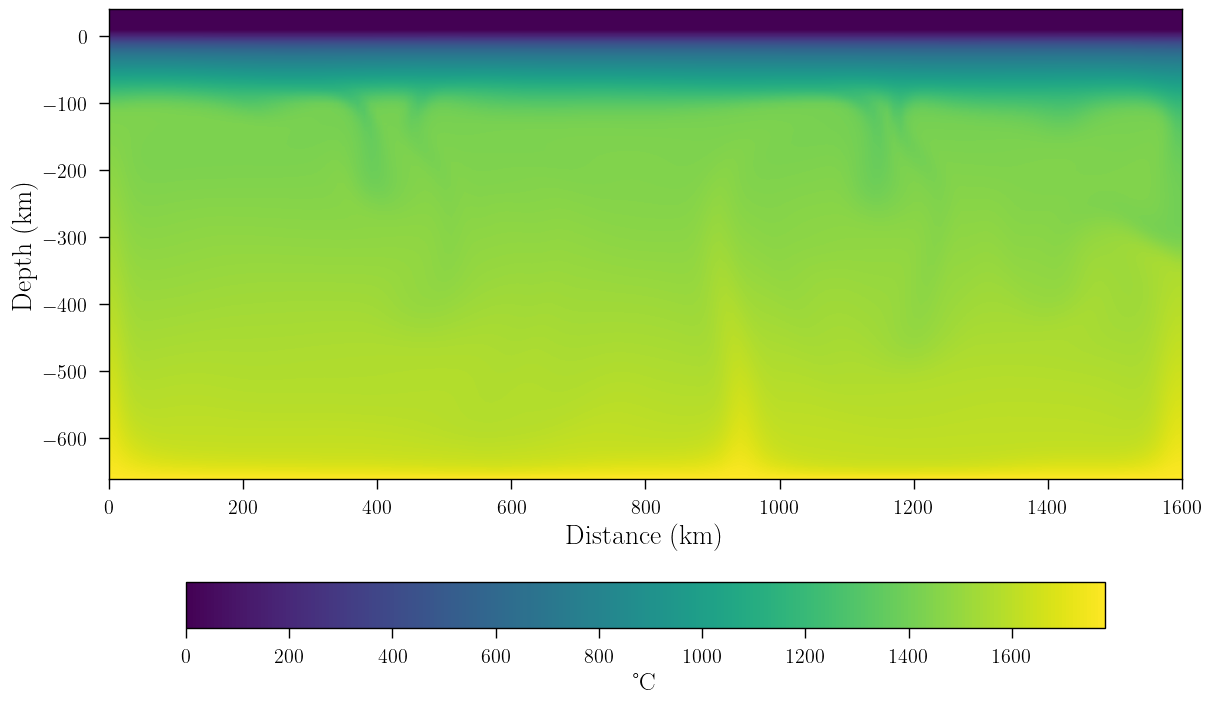

In [7]:
# d = Datai
d = temper_interp#[::-1] #botar na ordem certa Nz, Nx
# d[d<=0] = 0
temper_interp_mean = np.mean(d, axis=1)

# for i in range(Nz):
#     d[i][0] = temper_interp_mean[i]
#     d[i][-1] = temper_interp_mean[i]

print(np.shape(Datai))
plt.close()            
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharex=True, sharey=True, constrained_layout=True)
im = ax.imshow(d[::-1], cmap='viridis', origin='lower', extent=(0, Lx/1.0E3, -Lz/1.0E3+40, 0+40))
clb = fig.colorbar(im, orientation='horizontal', fraction=0.08)
clb.set_label('°C', size=18)

fsize = 20
ax.set_xlabel('Distance (km)', fontsize=fsize)
ax.set_ylabel('Depth (km)', fontsize=fsize)

# Keel scenario: mean thermal profiles at the keel and outside

keel/stable_PT200_keel_HprodAst/
stable/stable_PT200_rheol19_c1250_C1_HprodAst/


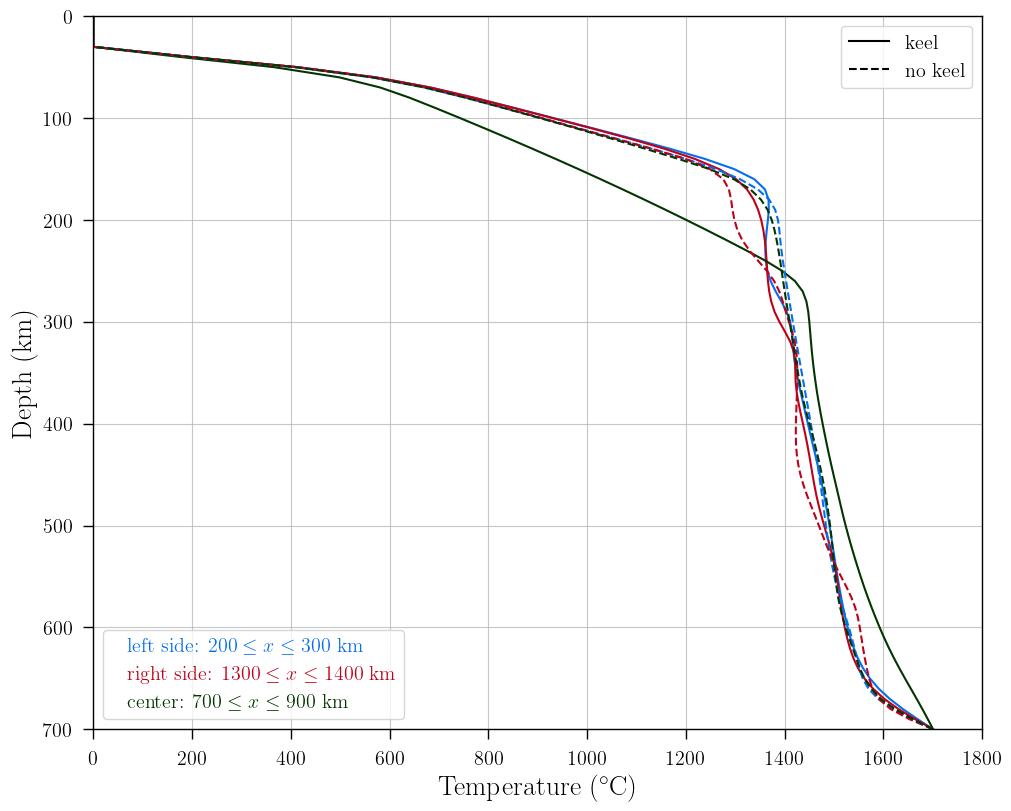

In [123]:
def fit_func(x, a, b):
    return a*x + b

scenarios = ['keel/stable_PT200_keel_HprodAst/', 'stable/stable_PT200_rheol19_c1250_C1_HprodAst/']
markers = ['-', '--']
prop = ['temperature']

plt.close()            
fig, ax = plt.subplots(1, 1, figsize=(10,8), sharex=True, sharey=True, constrained_layout=True)

for scenario, marker in zip(scenarios, markers):
    #Read thermal state
    print(scenario)
    fpath = machine_path + '/Doutorado/cenarios/mandyoc/' + scenario
    Nx, Nz, Lx, Lz = read_params(fpath)

    #Used to map interface
    x = np.linspace(0, Lx/1000.0, Nx)
    z = np.linspace(Lz/1000.0, 0, Nz)
    xx, zz  = np.meshgrid(x, z)
    #Z = np.linspace(Lz_aux/1000.0, 0, 8001) #zi
    
    #read time_*.txt files
    steps = sorted(glob.glob(fpath+"time_*.txt"), key=os.path.getmtime)
    step_final = int(steps[-1].split('/')[-1][5:-4])
    t0 = int(steps[0].split('/')[-1][5:-4])
    t1 = int(steps[1].split('/')[-1][5:-4])
    d_step = (t1 - t0)*1
    step_final = int(steps[-1].split('/')[-1][5:-4])
    
    time_fname = fpath + 'time_' + str(step_final) + '.txt'
    time = np.loadtxt(time_fname, usecols=2, max_rows=1)

    Datai = read_data('temperature', step_final, Nz, Nx, fpath)
    
    #selec regions
    xleft = (xx>=200) & (xx <= 300)
    xright = (xx>=1300) & (xx <= 1400)
    xcenter = (xx>=700) & (xx <= 900) #craton
    
    Datal = Datai[xleft].reshape(Nz, len(xleft[0][xleft[0]==True]))
    Datar = Datai[xright].reshape(Nz, len(xright[0][xright[0]==True]))
    Datac = Datai[xcenter].reshape(Nz, len(xcenter[0][xcenter[0]==True]))
    
    #calc horizontal mean
    Datal_mean = np.mean(Datal, axis=1)
    Datar_mean = np.mean(Datar, axis=1)
    Datac_mean = np.mean(Datac, axis=1)
    
    ax.plot(Datal_mean, z, linestyle=marker, color='xkcd:cerulean blue')#, label=r'left side: $200 \leq x \leq 300$ km')
    ax.plot(Datar_mean, z, linestyle=marker, color = 'xkcd:scarlet')#, label=r'right side:  $1300 \leq x \leq 1400$ km')
    ax.plot(Datac_mean, z, linestyle=marker, color = 'xkcd:dark green')#, label=r'center: $ 700 \leq x \leq 900$ km')
    
#set plot details
fsize = 20
ax.set_xlabel(r'Temperature ($^{\circ}$C)', fontsize=fsize)
ax.set_ylabel('Depth (km)', fontsize=fsize)
ax.grid('-k', alpha=0.7)
ax.set_xlim(0, 1800)
ax.set_ylim(700, 0)

# ghost points
ax.plot([-10, -10], [-10, -10], color='xkcd:cerulean blue', label=r'left side: $200 \leq x \leq 300$ km')
ax.plot([-10, -10], [-10, -10], color='xkcd:scarlet', label=r'right side:  $1300 \leq x \leq 1400$ km')
ax.plot([-10, -10], [-10, -10], color='xkcd:dark green', label=r'center: $ 700 \leq x \leq 900$ km')
ax.legend(loc='lower left', labelcolor='linecolor', handlelength=0)

ax2 = ax.twinx()
ax2.axis('off')
ax2.plot([-10, -10], [-10, -10], markers[0], color='k', label='keel')
ax2.plot([-10, -10], [-10, -10], markers[-1], color='k', label='no keel')
ax2.legend(loc='upper right')

figname = 'keel_vs_stable_PT200'
fig.savefig('out/plots/' + figname+'.pdf', dpi=400)
fig.savefig('out/plots/' + figname+'.png', dpi=400)

# INITIAL vs FINAL THERMAL PROFILES

stable_PT200_rheol19_075kappa_c1250_C1/
/home/joao_macedo/Doutorado/cenarios/mandyoc/stable_PT200_rheol19_075kappa_c1250_C1/time_0.txt
/home/joao_macedo/Doutorado/cenarios/mandyoc/stable_PT200_rheol19_075kappa_c1250_C1/time_200000.txt


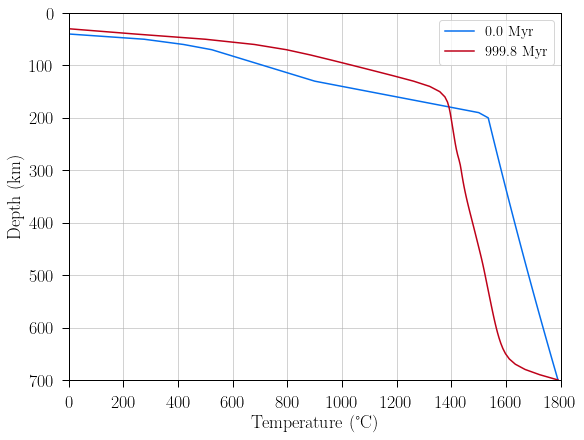

In [11]:
# scenarios = ['stable_PT200_rheol19_075kappa_c1250_C1/']
scenarios = ['stable_PT200_rheol19_c1250_C1/']

# scenarios = ['stable_PT200_rheol19_075kappa_c1250_C1/']

prop = ['temperature']

fig, ax = plt.subplots(1, 1, figsize=(8,6), sharex=True, sharey=True, constrained_layout=True)
label_fsize = 18
plt.rc('xtick', labelsize=label_fsize)
plt.rc('ytick', labelsize=label_fsize)

for scenario in scenarios:
    print(scenario)
    fpath = machine_path + '/Doutorado/cenarios/mandyoc/' + scenario
    Nx, Nz, Lx, Lz = read_params(fpath)

    #Used to map interface
    z = np.linspace(Lz/1000.0, 0, Nz)
    Z = np.linspace(Lz/1000.0, 0, 8001) #zi
    #read time_*.txt files
    steps = sorted(glob.glob(fpath+"time_*.txt"), key=os.path.getmtime)
    step_initial = int(steps[0].split('/')[-1][5:-4])
    t0 = int(steps[0].split('/')[-1][5:-4])
    t1 = int(steps[1].split('/')[-1][5:-4])
    d_step = (t1 - t0)*1
    step_final = int(steps[-1].split('/')[-1][5:-4])
    
#     times = [step_initial]
#     times = [step_final]
    times = [step_initial, step_final]
    for t in times:    
        time_fname = fpath + 'time_' + str(t) + '.txt'
        print(time_fname)
        time = np.loadtxt(time_fname, usecols=2, max_rows=1)
        Datai = read_data(prop[0], t, Nz, Nx, fpath) #(Nz, Nx)
        datai_mean = np.mean(Datai, axis=1) #horizontal mean
        ax.plot(datai_mean, z, '-', label=str(time/1.0E6)+' Myr')
        
ax.set_ylim([700, 0])
ax.set_xlim([0, 1800])
ax.grid(':k', alpha=0.7)
ax.set_xlabel('Temperature (°C)', fontsize=label_fsize)
ax.set_ylabel('Depth (km)', fontsize=label_fsize)

ax.legend(loc='best')

figname = scenarios[0][:-1] + '_Ti_Tf_profile'
fig.savefig('out/' + figname+'.pdf', dpi=400)

# CALCULATE MEAN HORIZONTALTEMPERATURE AND INTERPOLATE TO INITAL THERMAL STATE

stable_PT200_rheol19_c1250_C1/
/home/joao_macedo/Doutorado/cenarios/mandyoc/stable/stable_PT200_rheol19_c1250_C1/time_200000.txt


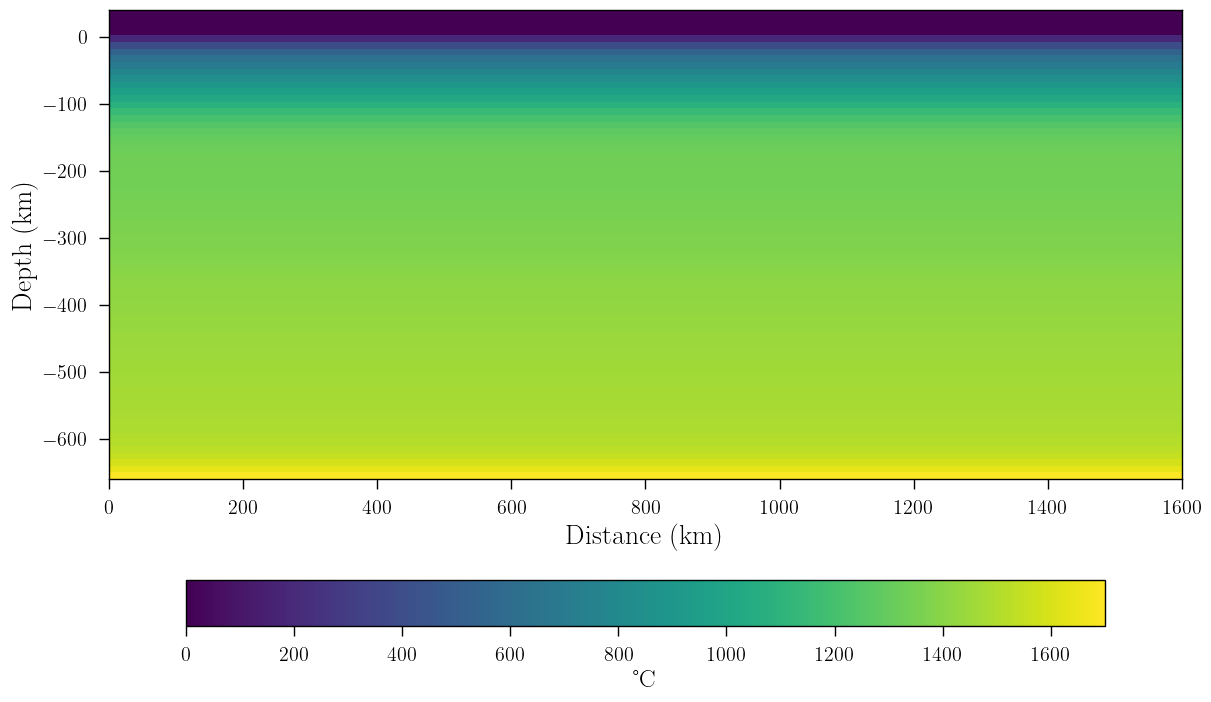

In [4]:
scenarios = ['stable_PT200_rheol19_c1250_C1/']

prop = ['temperature']

for scenario in scenarios:
    print(scenario)
    fpath = machine_path + '/Doutorado/cenarios/mandyoc/stable/' + scenario
    Nx, Nz, Lx, Lz = read_params(fpath)

    #Used to map interface
    z = np.linspace(Lz/1000.0, 0, Nz)
    Z = np.linspace(Lz/1000.0, 0, 8001) #zi
    #read time_*.txt files
    steps = sorted(glob.glob(fpath+"time_*.txt"), key=os.path.getmtime)
    step_initial = int(steps[0].split('/')[-1][5:-4])
    t0 = int(steps[0].split('/')[-1][5:-4])
    t1 = int(steps[1].split('/')[-1][5:-4])
    d_step = (t1 - t0)*1
    step_final = int(steps[-1].split('/')[-1][5:-4])
    
#     times = [step_initial]
#     times = [step_final]
    times = [step_final]
    for t in times:    
        time_fname = fpath + 'time_' + str(t) + '.txt'
        print(time_fname)
        time = np.loadtxt(time_fname, usecols=2, max_rows=1)
        Datai = read_data(prop[0], t, Nz, Nx, fpath) #(Nz, Nx)
        datai_mean = np.mean(Datai, axis=1) #horizontal mean
        dc = np.copy(Datai.T)
        for i in range(len(dc)):
            dc[i, :] = datai_mean
            
##################################################################################################            
d = Datai #Nz, Nx

plt.close()            
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharex=True, sharey=True, constrained_layout=True)
im = ax.imshow(d, cmap='viridis', origin='lower', extent=(0,Lx/1.0E3,-Lz/1.0E3+40,0+40))
clb = fig.colorbar(im, orientation='horizontal', fraction=0.08, )
clb.set_label('°C', size=18)

fsize = 20
ax.set_xlabel('Distance (km)', fontsize=fsize)
ax.set_ylabel('Depth (km)', fontsize=fsize)

figname = scenarios[0][:-1] + '_T_state_final'
fig.savefig(figname+'.pdf', dpi=400)

#################################################################################################
#APPLY THE HORIZONTAL MEAN TEMPERATURE PROFILE INTO MESH
#run the cell above!
# dc = np.copy(d.T) #Nx, Nz
# # dc[0,:]
# for i in range(len(dc)):
#     dc[i, :] = dm
    
dc = dc.T

plt.close()
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharex=True, sharey=True, constrained_layout=True)
im = ax.imshow(dc, cmap='viridis', origin='lower', extent=(0,Lx/1.0E3,-Lz/1.0E3+40,0+40))
clb = fig.colorbar(im, orientation='horizontal', fraction=0.08, )
clb.set_label('°C', size=18)

fsize = 20
ax.set_xlabel('Distance (km)', fontsize=fsize)
ax.set_ylabel('Depth (km)', fontsize=fsize)

figname = scenarios[0][:-1] + '_T_mean_input_rift'
fig.savefig('out/plots/' + figname+'.pdf', dpi=400)

In [80]:
Datai

array([[1700.63, 1700.63, 1700.63, ..., 1700.63, 1700.63, 1700.63],
       [1617.3 , 1617.47, 1617.97, ..., 1688.24, 1689.89, 1690.27],
       [1553.35, 1553.59, 1554.31, ..., 1675.9 , 1679.2 , 1679.96],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [22]:
# datai_mean
z_cond1 = (z >= 560) & (z <= 600)
z[z_cond1], datai_mean[z_cond1], datai_mean
# zcond = (z<=600) & (z>=400)

(array([600., 590., 580., 570., 560.]),
 array([1479.05341615, 1475.32304348, 1471.94937888, 1468.7921118 ,
        1465.73708075]),
 array([1700.63      , 1639.55018634, 1588.88621118, 1552.65881988,
        1528.81627329, 1513.22291925, 1502.48136646, 1494.55627329,
        1488.37093168, 1483.32223602, 1479.05341615, 1475.32304348,
        1471.94937888, 1468.7921118 , 1465.73708075, 1462.69391304,
        1459.59453416, 1456.38689441, 1453.03962733, 1449.5378882 ,
        1445.8831677 , 1442.09142857, 1438.19180124, 1434.22409938,
        1430.22968944, 1426.26130435, 1422.37670807, 1418.64975155,
        1415.08478261, 1411.41695652, 1406.97937888, 1401.19310559,
        1394.26906832, 1387.11757764, 1380.60186335, 1375.04291925,
        1370.29714286, 1366.05322981, 1362.09708075, 1358.30043478,
        1354.6210559 , 1351.07354037, 1347.69819876, 1344.54093168,
        1341.61434783, 1338.86590062, 1336.12807453, 1333.0789441 ,
        1329.1547205 , 1323.46695652, 1314.69484472

# Plot deviation from horizontal mean

stable_PT400_rheol19_c1250_C1_HprodAst/
/home/joao_macedo/Doutorado/cenarios/mandyoc/stable/stable_PT400_rheol19_c1250_C1_HprodAst/time_203500.txt


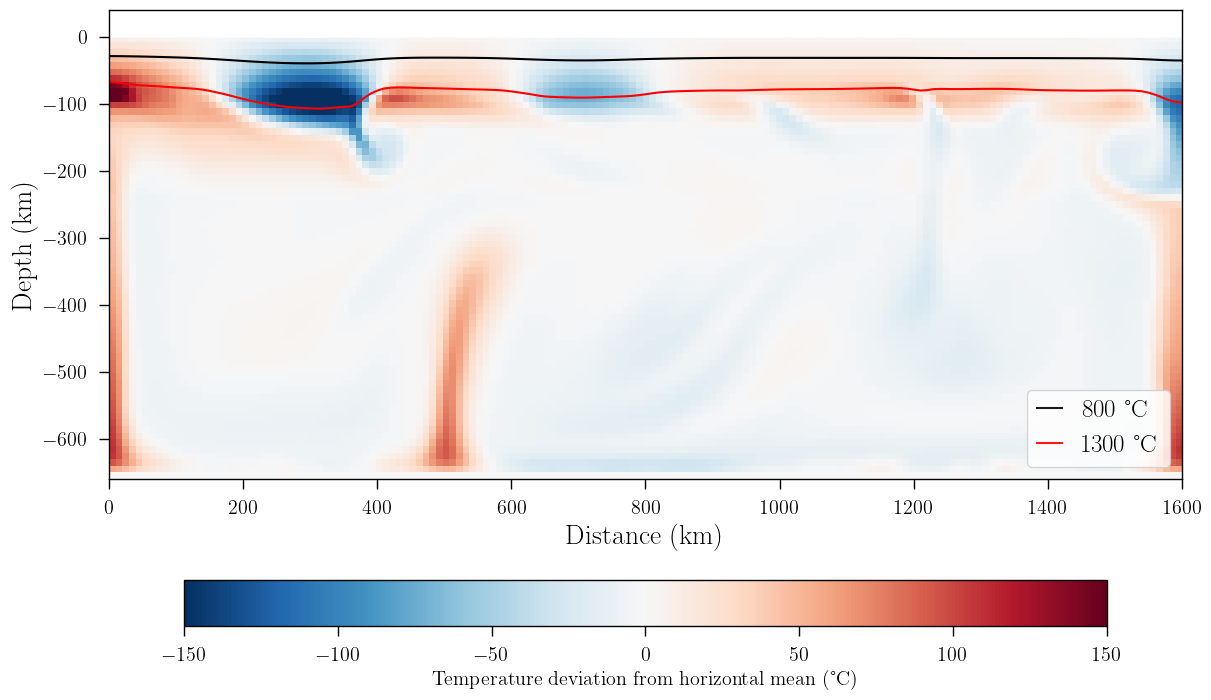

In [5]:
# scenarios = ['stable_rheol19_1Gyr_400ppe_10x10_c_1250_C1/']
# scenarios = ['stable_PT100_rheol19_c1250_C1/']
# scenarios = ['stable_PT200_rheol19_c1250_C1/']
# scenarios = ['stable_PT200_rheol19_c1250_C1_HprodAst/']
scenarios = ['stable_PT400_rheol19_c1250_C1_HprodAst/']

prop = ['temperature']

for scenario in scenarios:
    print(scenario)
    fpath = machine_path + '/Doutorado/cenarios/mandyoc/stable/' + scenario
    Nx, Nz, Lx, Lz = read_params(fpath)
    
    #Used to map interface
    z = np.linspace(Lz/1000.0, 0, Nz)
    Z = np.linspace(Lz/1000.0, 0, 8001) #zi
    xi = np.linspace(0, Lx/1000, Nx)
    zi = np.linspace(-Lz/1000+40, 0+40, Nz)
    xx, zz = np.meshgrid(xi, zi)
    
    #read time_*.txt files
    steps = sorted(glob.glob(fpath+"time_*.txt"), key=os.path.getmtime)
    step_initial = int(steps[0].split('/')[-1][5:-4])
    t0 = int(steps[0].split('/')[-1][5:-4])
    t1 = int(steps[1].split('/')[-1][5:-4])
    d_step = (t1 - t0)*1
    step_final = int(steps[-1].split('/')[-1][5:-4])
    
    step=step_final
    fname = fpath+'sp_surface_global_' + str(step) + '.txt'
    topo = np.loadtxt(fname, unpack=True, skiprows=2, comments='P')/1.0E3
    condx = (xi >= 100) & (xi <= 600)
    z_mean = np.mean(topo[condx])    
    topo += np.abs(z_mean)
    
    
#     times = [step_initial]
#     times = [step_final]
    times = [step_final]
    for t in times:
        time_fname = fpath + 'time_' + str(t) + '.txt'
        print(time_fname)
        time = np.loadtxt(time_fname, usecols=2, max_rows=1)
        Datai = read_data(prop[0], t, Nz, Nx, fpath) #(Nz, Nx)
        datai_mean = np.mean(Datai, axis=1) #horizontal mean
        dc = np.copy(Datai.T)
        for i in range(len(dc)):
            dc[i, :] = datai_mean

#removing horizontal mean temperature
A = Datai  #shape: (Nz, Nx) #Datai was read in the right shape
# B = np.transpose(A) #shape: (Nz, Nx) this is old
C = datai_mean #np.mean(B, axis=1) #shape: 151==Nz
D = (A.T - C) #B.T (Nx,Nz) para conseguir subtrair C

plt.close()
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharex=True, sharey=True, constrained_layout=True)
im = ax.imshow(np.transpose(D), cmap='RdBu_r', origin='lower',
                     extent=(0,Lx/1.0E3,-Lz/1.0E3+40,0+40), vmin=-150, vmax=150)
ax.fill_between(xx[0], topo, 40, color='white', alpha=1.0)

ax.contour(xx, zz, Datai, 100, levels=[800, 1300], colors=['black', 'red'],)

prop_label = 'Temperature deviation from horizontal mean (°C)'
fig.colorbar(im, ax=ax, orientation='horizontal', label=prop_label, fraction=0.08)

ax.plot([-2, -2],[-2, -2], '-', color='black', alpha=0.9, label='800 °C')
ax.plot([-2, -2],[-2, -2], '-', color='red', alpha=0.9, label='1300 °C')
ax.legend(loc='lower right', ncol=1, fontsize=18, columnspacing=0.5, handlelength=1)

ax.set_xlim([0,Lx/1000])
ax.set_ylim([-Lz/1000+40, 40])

fsize = 20
ax.set_xlabel('Distance (km)', fontsize=fsize)
ax.set_ylabel('Depth (km)', fontsize=fsize)

figname = scenarios[0][:-1] + '_Thermal_State'
fig.savefig(figname+'.pdf', dpi=400)

# Plot Vs anomnaly

stable_PT200_rheol19_c1250_C1_HprodAst/
/home/joao_macedo/Doutorado/cenarios/mandyoc/stable/stable_PT200_rheol19_c1250_C1_HprodAst/time_200000.txt


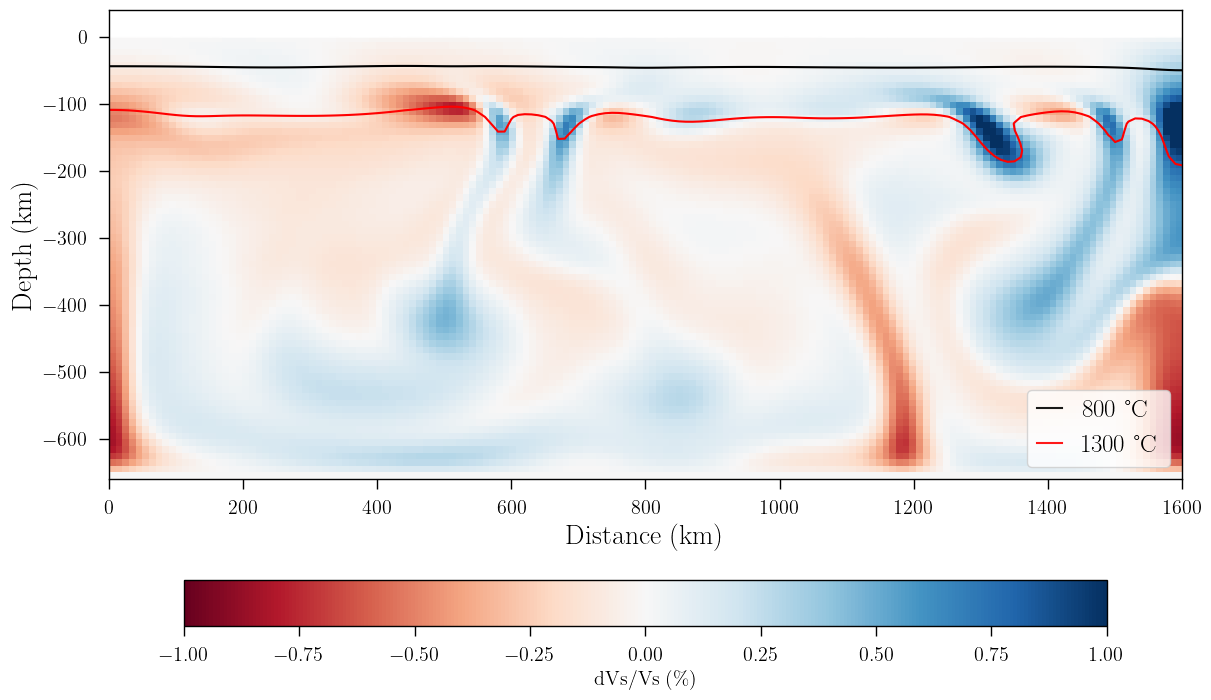

In [8]:
# scenarios = ['stable_rheol19_1Gyr_400ppe_10x10_c_1250_C1/']
# scenarios = ['stable_PT100_rheol19_c1250_C1/']
# scenarios = ['stable_PT200_rheol19_c1250_C1/']
scenarios = ['stable_PT200_rheol19_c1250_C1_HprodAst/']
# scenarios = ['stable_PT400_rheol19_c1250_C1_HprodAst/']

prop = ['temperature']

for scenario in scenarios:
    print(scenario)
    fpath = machine_path + '/Doutorado/cenarios/mandyoc/stable/' + scenario
    Nx, Nz, Lx, Lz = read_params(fpath)
    
    #Used to map interface
    z = np.linspace(Lz/1000.0, 0, Nz)
    Z = np.linspace(Lz/1000.0, 0, 8001) #zi
    xi = np.linspace(0, Lx/1000, Nx)
    zi = np.linspace(-Lz/1000+40, 0+40, Nz)
    xx, zz = np.meshgrid(xi, zi)
    
    #read time_*.txt files
    steps = sorted(glob.glob(fpath+"time_*.txt"), key=os.path.getmtime)
    step_initial = int(steps[0].split('/')[-1][5:-4])
    t0 = int(steps[0].split('/')[-1][5:-4])
    t1 = int(steps[1].split('/')[-1][5:-4])
    d_step = (t1 - t0)*1
    step_final = int(steps[-1].split('/')[-1][5:-4])
    
    step=step_final
    fname = fpath+'sp_surface_global_' + str(step) + '.txt'
    topo = np.loadtxt(fname, unpack=True, skiprows=2, comments='P')/1.0E3
    condx = (xi >= 100) & (xi <= 600)
    z_mean = np.mean(topo[condx])    
    topo += np.abs(z_mean)
    
    
#     times = [step_initial]
#     times = [step_final]
    times = [step_final]
    for t in times:
        time_fname = fpath + 'time_' + str(t) + '.txt'
        print(time_fname)
        time = np.loadtxt(time_fname, usecols=2, max_rows=1)
        Datai = read_data(prop[0], t, Nz, Nx, fpath) #(Nz, Nx)
        datai_mean = np.mean(Datai, axis=1) #horizontal mean
        dc = np.copy(Datai.T)
        for i in range(len(dc)):
            dc[i, :] = datai_mean

#removing horizontal mean temperature
A = Datai  #shape: (Nz, Nx) #Datai was read in the right shape
# B = np.transpose(A) #shape: (Nz, Nx) this is old
C = datai_mean #np.mean(B, axis=1) #shape: 151==Nz
D = (A.T - C) #B.T (Nx,Nz) para conseguir subtrair C

#Calculate Vs Anomaly
model = 'King'
# model = 'Karato'

if(model=='King'):
    VsAn = 100*D/(-1.0e4) #From King and Ritsema (2000)
    prop_label = 'dVs/Vs (\%)'
    vminmax = [-1, 1]
else:
    VsAn = (-1.54*1.0e-4) * D #From Karato (1993) - Table 1 for Q=100 upper mantle: dlnVs/dT = -1.54e-4 1/K
    prop_label = r'$\partial$ln Vs'
    vminmax = [-0.02, 0.02]
    
plt.close()
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharex=True, sharey=True, constrained_layout=True)

im = ax.imshow(np.transpose(VsAn), cmap='RdBu', origin='lower',
                     extent=(0,Lx/1.0E3,-Lz/1.0E3+40,0+40), vmin=vminmax[0], vmax=vminmax[-1])


ax.fill_between(xx[0], topo, 40, color='white', alpha=1.0)

ax.contour(xx, zz, Datai, 100, levels=[800, 1300], colors=['black', 'red'],)

op_label = r'$\partial$ln Vs'
fig.colorbar(im, ax=ax, orientation='horizontal', label=prop_label, fraction=0.08)

ax.plot([-2, -2],[-2, -2], '-', color='black', alpha=0.9, label='800 °C')
ax.plot([-2, -2],[-2, -2], '-', color='red', alpha=0.9, label='1300 °C')
ax.legend(loc='lower right', ncol=1, fontsize=18, columnspacing=0.5, handlelength=1)

ax.set_xlim([0,Lx/1000])
ax.set_ylim([-Lz/1000+40, 40])

fsize = 20
ax.set_xlabel('Distance (km)', fontsize=fsize)
ax.set_ylabel('Depth (km)', fontsize=fsize)

figname = scenarios[0][:-1] + '_Vs_Anomaly_' + model
fig.savefig(figname+'.pdf', dpi=400)

Text(0, 0.5, 'Depth (km)')

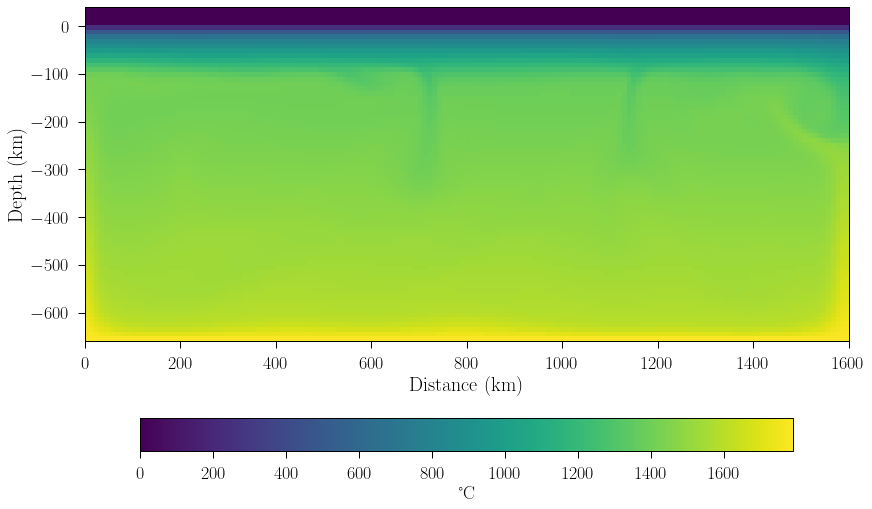

In [21]:
#FINAL THERMAL STATE PLOT
#run the cell above!

d = Datai #Nz, Nx
dm = datai_mean
a = np.shape(d)
# len(d)

plt.close()
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharex=True, sharey=True, constrained_layout=True)
im = ax.imshow(d, cmap='viridis', origin='lower', extent=(0,Lx/1.0E3,-Lz/1.0E3+40,0+40))
clb = fig.colorbar(im, orientation='horizontal', fraction=0.08, )
clb.set_label('°C', size=18)

fsize = 20
ax.set_xlabel('Distance (km)', fontsize=fsize)
ax.set_ylabel('Depth (km)', fontsize=fsize)
# plt.plot(d.T[80], z)
# plt.ylim([700, 0])
# plt.xlim([0, 1800])

Text(0, 0.5, 'Depth (km)')

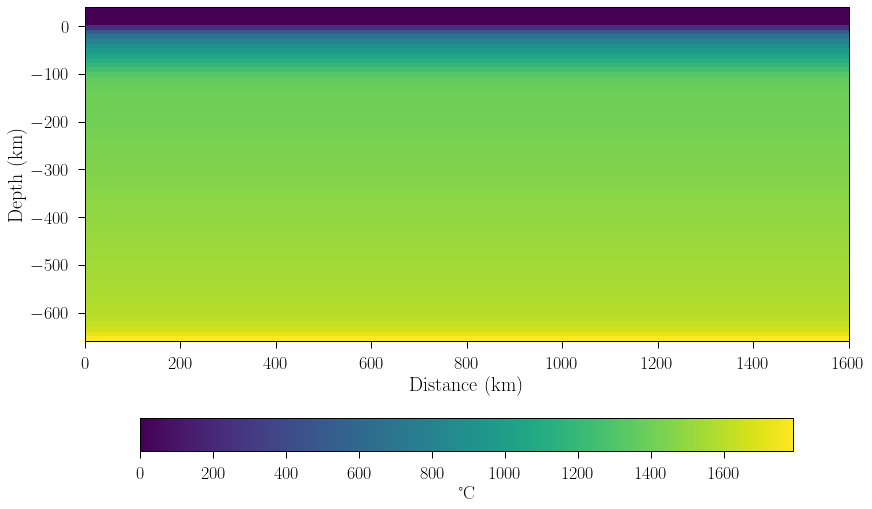

In [26]:
#APPLY THE HORIZONTAL MEAN TEMPERATURE PROFILE INTO MESH
#run the cell above!
dc = np.copy(d.T) #Nx, Nz
# dc[0,:]
for i in range(len(dc)):
    dc[i, :] = dm

plt.close()
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharex=True, sharey=True, constrained_layout=True)
im = ax.imshow(dc.T, cmap='viridis', origin='lower', extent=(0,Lx/1.0E3,-Lz/1.0E3+40,0+40))
clb = fig.colorbar(im, orientation='horizontal', fraction=0.08, )
clb.set_label('°C', size=18)

fsize = 20
ax.set_xlabel('Distance (km)', fontsize=fsize)
ax.set_ylabel('Depth (km)', fontsize=fsize)

# plt.plot(dc[0],z)
# plt.ylim([700, 0])
# plt.xlim([0, 1800])

# TESTS

In [169]:
tfit[np.where(zdata==40.0)[0][0]]

1251.2404955713962

In [106]:
points = np.array([(1, 1), (2, 4), (3, 1), (9, 3)])
# get x and y vectors
x = points[:,0]
y = points[:,1]
x, y

(array([1, 2, 3, 9]), array([1, 4, 1, 3]))